In [1]:
# pip install ipython-sparql-pandas
# run `sparql?` in a cell for documentation
%load_ext ipython_sparql_pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#make sure FinalMusicOntology.ttl file is loaded in your GraphDB inside a "musicgenres" repository when running the local queries

In [22]:
%%sparql http://localhost:7200/repositories/musicgenres -s musicgenres
PREFIX ms: <http://www.example.org/ibrahimi/music/>
SELECT  ?genres (COUNT(*)as ?numArtists){
    ?numArtists ms:has ?genres
} GROUP BY ?genres HAVING (COUNT(?numArtists)>= 2)

genres  numArtists
0  http://www.example.org/ibrahimi/music/canadian...           3
1          http://www.example.org/ibrahimi/music/pop           4
2          http://www.example.org/ibrahimi/music/edm           2
3        http://www.example.org/ibrahimi/music/latin           4
4    http://www.example.org/ibrahimi/music/reggaeton           2
5  http://www.example.org/ibrahimi/music/reggaeto...           2
6  http://www.example.org/ibrahimi/music/dance%20pop           6

In [23]:
musicgenres['genres']=musicgenres['genres'].apply(lambda x: x.split('/')[-1].replace('%20',' '))

# Plotting Top Music Genres from Spotify

<AxesSubplot:ylabel='numArtists'>

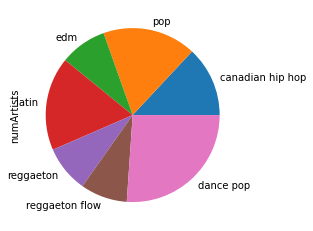

In [24]:
musicgenres.set_index('genres', inplace=True)
musicgenres['numArtists'].plot.pie()

# Extracting Top Artists from billboard

In [25]:
%%sparql http://localhost:7200/repositories/musicgenres -s topartists
PREFIX ms: <http://www.example.org/ibrahimi/music/>
SELECT  DISTINCT ?artists 	{
    ?artists ms:has_weeks_on_board ?weeksonboard .
} ORDER BY DESC(?weeksonboard)

artists
0  http://www.example.org/ibrahimi/music/Carrie%2...
1  http://www.example.org/ibrahimi/music/Jason%20...
2        http://www.example.org/ibrahimi/music/Jewel
3  http://www.example.org/ibrahimi/music/LeAnn%20...
4   http://www.example.org/ibrahimi/music/AWOLNATION
5        http://www.example.org/ibrahimi/music/Adele
6  http://www.example.org/ibrahimi/music/Imagine%...
7  http://www.example.org/ibrahimi/music/LMFAO%20...
8  http://www.example.org/ibrahimi/music/OneRepublic
9  http://www.example.org/ibrahimi/music/The%20We...

In [26]:
topartists['artists']=topartists['artists'].apply(lambda x: x.split('/')[-1].replace('%20',' '))

In [27]:
%%sparql http://dbpedia.org/sparql/  -s dbpedia_genrequery
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ms: <http://www.example.org/ibrahimi/music/>
SELECT DISTINCT ?genres count(?artist) as ?numArtist
WHERE {
  #?genres dbo:wikiPageWikiLink dbr:List_of_popular_music_genres.
  ?genres dbo:wikiPageWikiLink dbr:Category:21st-century_music_genres.
  ?artist  dbo:genre ?genres
	
} group by ?genres order by desc (count(?artist)) 
LIMIT 10

# list of most popular music categories 

genres  numArtist
0       http://dbpedia.org/resource/Alternative_rock      10459
1             http://dbpedia.org/resource/Rock_music      10282
2              http://dbpedia.org/resource/Punk_rock       4431
3       http://dbpedia.org/resource/Electronic_music       3363
4      http://dbpedia.org/resource/Alternative_metal       1569
5          http://dbpedia.org/resource/Post-hardcore       1170
6              http://dbpedia.org/resource/Metalcore       1041
7  http://dbpedia.org/resource/Contemporary_Chris...        997
8               http://dbpedia.org/resource/Nu_metal        984
9            http://dbpedia.org/resource/Death_metal        866

In [28]:
dbpedia_genrequery['genres']=dbpedia_genrequery['genres'].apply(lambda x: x.split('/')[-1])

# Music Genres with Most Artists

<AxesSubplot:ylabel='genres'>

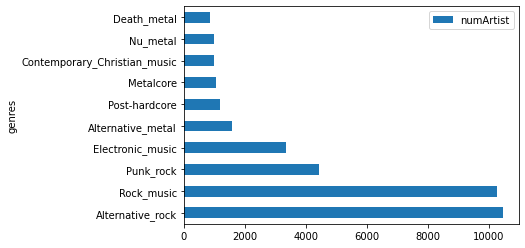

In [29]:
dbpedia_genrequery.plot.barh('genres', 'numArtist')

In [30]:
%%sparql http://dbpedia.org/sparql/  -s dbpedia_femalequery
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ms: <http://www.example.org/ibrahimi/music/>
SELECT DISTINCT ?femaleartist COUNT(?song) AS ?numSong
WHERE {
  ?femaleartist dbo:wikiPageWikiLink dbr:Category:American_female_singer-songwriters .
  ?song dbo:artist ?femaleartist .
	
} group by ?femaleartist order by desc (count(?song))
LIMIT 10

femaleartist  numSong
0      http://dbpedia.org/resource/Taylor_Swift      126
1           http://dbpedia.org/resource/Madonna      108
2      http://dbpedia.org/resource/Mariah_Carey      100
3              http://dbpedia.org/resource/Cher       77
4      http://dbpedia.org/resource/Dolly_Parton       73
5     http://dbpedia.org/resource/Janet_Jackson       70
6    http://dbpedia.org/resource/Gloria_Estefan       68
7      http://dbpedia.org/resource/Donna_Summer       68
8    http://dbpedia.org/resource/Jennifer_Lopez       67
9  http://dbpedia.org/resource/Barbra_Streisand       60

In [31]:
#df1 = 
female = dbpedia_femalequery['femaleartist'].apply(lambda x: x.split('/')[-1])

# Top Female Artists 

<AxesSubplot:xlabel='femaleartist'>

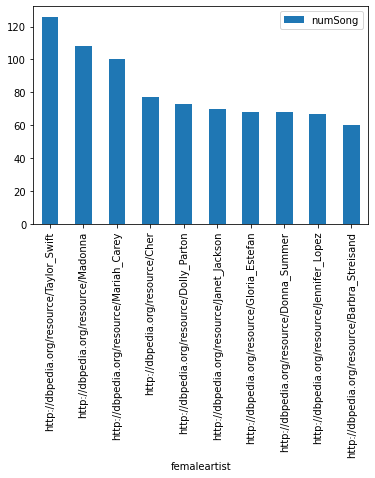

In [32]:
#import matplotlib.pyplot as plt
#df1 = 
dbpedia_femalequery.plot.bar(x="femaleartist", y=["numSong"])
#plt.show()
#print(df1)

In [33]:
%%sparql http://dbpedia.org/sparql/  -s dbpedia_malequery
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ms: <http://www.example.org/ibrahimi/music/>
SELECT DISTINCT ?maleartist COUNT(?song) AS ?numSong
WHERE {
?maleartist dbo:wikiPageWikiLink dbr:Category:American_male_singer-songwriters.
?song dbo:artist ?maleartist .
} group by ?maleartist order by desc (count(?song))
LIMIT 10

maleartist  numSong
0          http://dbpedia.org/resource/Bob_Dylan      228
1       http://dbpedia.org/resource/George_Jones      135
2        http://dbpedia.org/resource/Johnny_Cash      111
3  http://dbpedia.org/resource/Bruce_Springsteen      105
4  http://dbpedia.org/resource/Prince_(musician)      105
5      http://dbpedia.org/resource/George_Strait      102
6         http://dbpedia.org/resource/Snoop_Dogg       89
7        http://dbpedia.org/resource/Marvin_Gaye       88
8      http://dbpedia.org/resource/Merle_Haggard       78
9        http://dbpedia.org/resource/Chris_Brown       72

In [34]:
#df2 = 
male = dbpedia_malequery['maleartist'].apply(lambda x: x.split('/')[-1])

# Top Male Artists

<AxesSubplot:xlabel='maleartist'>

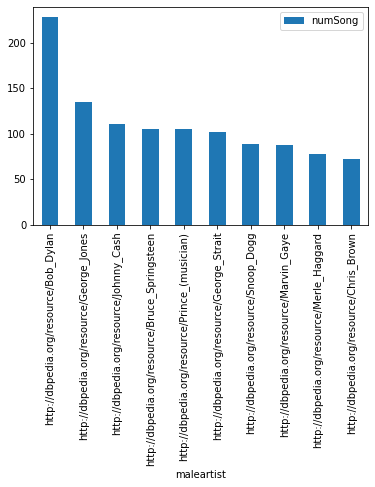

In [35]:
#df2 = 
dbpedia_malequery.plot.bar(x="maleartist", y=["numSong"])
#print(df2)

# Merging Top Female, and Male Artist and Genre with Most Artists

In [36]:
merge = pd.merge(male,female, on=dbpedia_genrequery['genres']) #on="numSong")
print(merge)

                          key_0         maleartist      femaleartist
0              Alternative_rock          Bob_Dylan      Taylor_Swift
1                    Rock_music       George_Jones           Madonna
2                     Punk_rock        Johnny_Cash      Mariah_Carey
3              Electronic_music  Bruce_Springsteen              Cher
4             Alternative_metal  Prince_(musician)      Dolly_Parton
5                 Post-hardcore      George_Strait     Janet_Jackson
6                     Metalcore         Snoop_Dogg    Gloria_Estefan
7  Contemporary_Christian_music        Marvin_Gaye      Donna_Summer
8                      Nu_metal      Merle_Haggard    Jennifer_Lopez
9                   Death_metal        Chris_Brown  Barbra_Streisand


xypos = np.arange(len(merge))
print(ypos)